In [ ]:
import numpy as np

In [ ]:
np.set_printoptions(precision = 4, suppress = True)

In [ ]:
a = np.array([[1,2,3,4], [1,1,2,3], [0,1,1,0]])
a

array([[1, 2, 3, 4],
       [1, 1, 2, 3],
       [0, 1, 1, 0]])

In [ ]:
u,s,vh = np.linalg.svd(a, full_matrices = True)

In [ ]:
print(np.diag(s))

[[6.7509 0.     0.    ]
 [0.     1.1734 0.    ]
 [0.     0.     0.2186]]


In [ ]:
s

array([6.7509, 1.1734, 0.2186])

In [ ]:
b = np.zeros((3,4))

In [ ]:
b[:, :-1] = np.diag(s)
b

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.2186, 0.    ]])

In [ ]:
u.dot(u.T)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [ ]:
#Reconstruction
np.dot(np.dot(u,b),vh)

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  1.,  2.,  3.],
       [ 0.,  1.,  1., -0.]])

In [ ]:
#Rank 2 approximation
s = np.array([6.7509, 1.1734, 0])
sd = np.diag(s)
b[:, :-1] = sd

In [ ]:
np.dot(np.dot(u,b),vh)

array([[ 1.0959,  1.9567,  3.0526,  3.9542],
       [ 0.8764,  1.0558,  1.9322,  3.0589],
       [-0.0559,  1.0252,  0.9693,  0.0267]])

In [ ]:
#SVD of an Image
import pandas as pd
from google.colab.patches import cv2_imshow
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import cv2 as cv

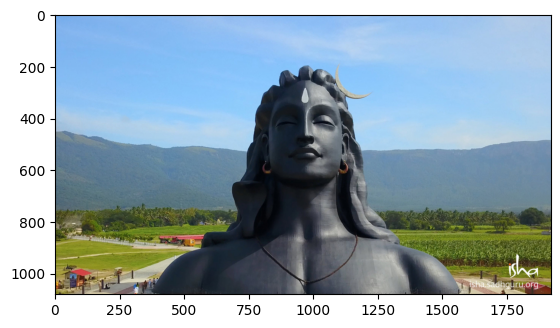

In [ ]:
url = "https://static.sadhguru.org/d/46272/1664421340-shiva-wallpaper-adiyogi-112ft-v3.jpg"
myImg = io.imread(url)
Mat = np.array(myImg)
plt.imshow(Mat)

In [ ]:
grayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
imgMat = np.array(list(grayImg), float)

In [ ]:
print(imgMat)

[[184. 184. 184. ... 208. 208. 208.]
 [184. 184. 184. ... 208. 208. 208.]
 [184. 184. 184. ... 208. 208. 208.]
 ...
 [109. 107. 108. ...  45.  74. 108.]
 [104. 100.  98. ...  50.  83. 119.]
 [105. 100.  96. ...  54.  91. 129.]]


In [ ]:
imgMat.shape

(1080, 1920)

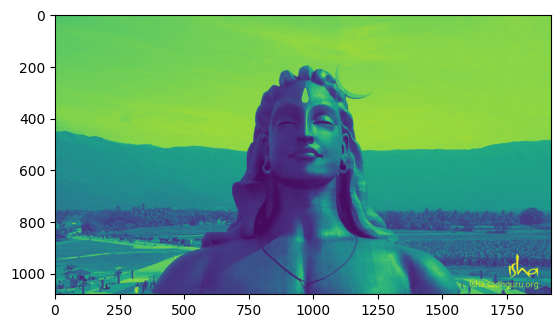

In [ ]:
plt.imshow(imgMat)

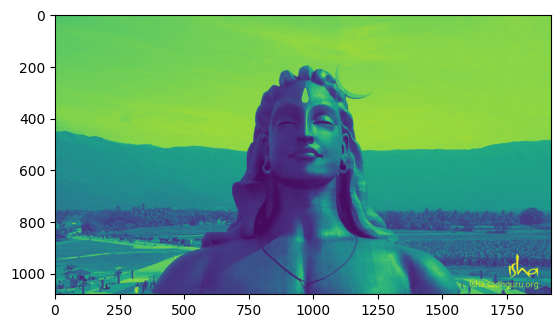

In [ ]:
scaledImg = (imgMat - imgMat.mean())/imgMat.std()
plt.imshow(scaledImg)

In [ ]:
varExplained = np.round(s**2/np.sum(s**2), decimals = 4)
varExplained.shape

(3,)

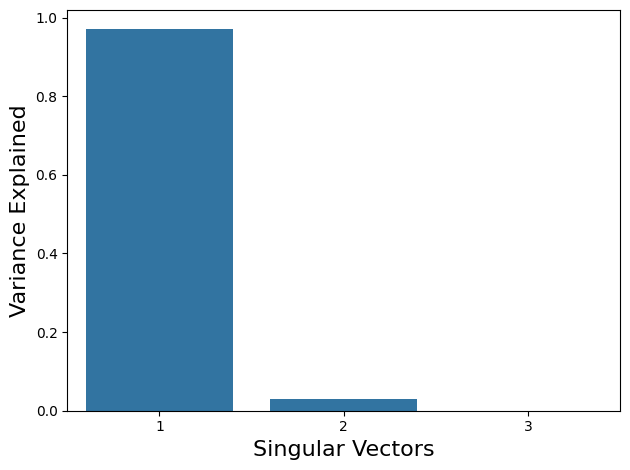

In [ ]:
import seaborn as sns
subset = 50
subset = min(subset, len(varExplained))
sns.barplot(x=list(range(1, subset + 1)), y=varExplained[:subset])
plt.xlabel("Singular Vectors", fontsize=16)
plt.ylabel("Variance Explained", fontsize=16)
plt.tight_layout()
plt.show()

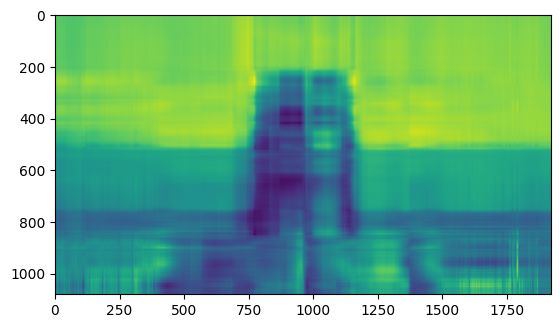

In [ ]:
# Reconstruction with top 5 Singular values
n = 5
u,s,v = np.linalg.svd(scaledImg, full_matrices = False)

k = np.dot(np.dot(u[:, :n], np.diag(s[:n])), v[:n, :])
plt.imshow(k)

In [ ]:
l = np.dot(np.dot(u[:, :50], np.diag(s[:50])), v[:50, :])
m = np.dot(np.dot(u[:, :100], np.diag(s[:100])), v[:100, :])

In [ ]:
s

array([1101.8943,  719.1798,  273.1226, ...,    0.0515,    0.0508,
          0.0483])

Text(0.5, 1.0, 'Original Image')

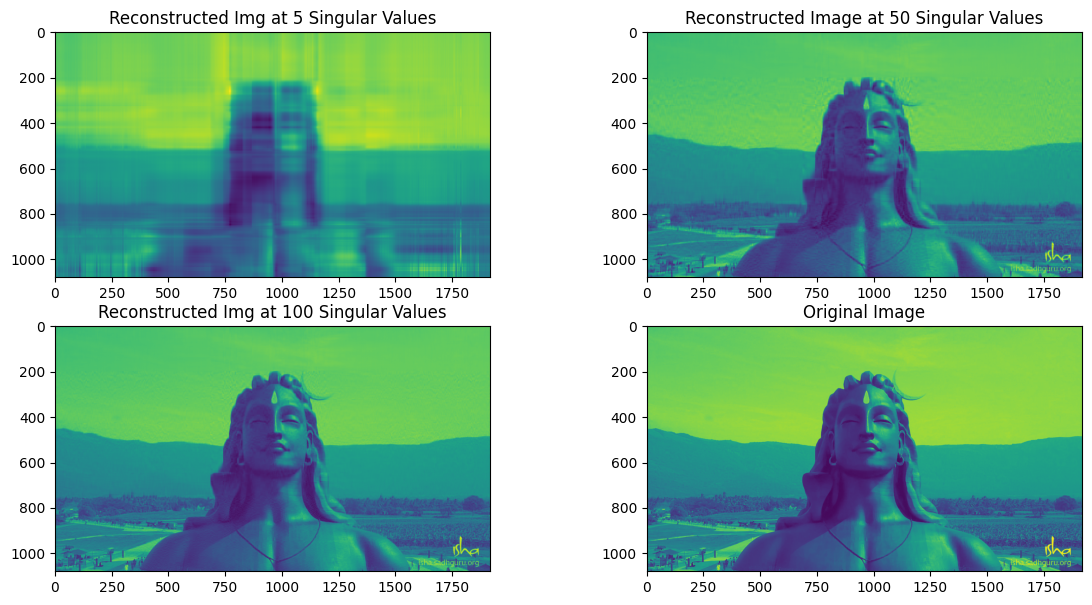

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].imshow(k)
axs[0,0].set_title("Reconstructed Img at 5 Singular Values")
axs[0,1].imshow(l)
axs[0,1].set_title("Reconstructed Image at 50 Singular Values")
axs[1,0].imshow(m)
axs[1,0].set_title("Reconstructed Img at 100 Singular Values")
axs[1,1].imshow(imgMat)
axs[1,1].set_title("Original Image")